# Select features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('data/preprocessed_train.csv')
train = pd.read_csv('data/Train.csv')
y = train['bank_account']

X.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,1.0,0.10,0.095238,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.20,0.642857,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.20,0.119048,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.20,0.214286,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.35,0.119048,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Feature selection Methods

### 1. Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

Many different statistical test scan be used with this selection method. For example the ANOVA F-value method is appropriate for numerical inputs and categorical data. This can be used via the f_classif() function. 

In [5]:
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import f_classif

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[3.005e+02 1.806e+02 1.082e+03 1.889e+01 8.882e+00 3.278e+02 5.996e+01
 3.125e+02 1.999e+00 1.002e+01 6.182e+01 8.752e+01 1.484e+01 7.889e-01
 1.774e+02 3.916e+01 6.517e+01 4.887e+02 8.724e+00 7.318e+02 3.655e+02
 1.463e+03 1.340e+03 9.225e-01 3.399e+01 1.386e+03 1.561e+03 7.841e+00
 2.302e+02 7.700e+01 1.550e+01 4.923e+01 6.006e+00 8.452e+02 7.770e+01
 1.850e+02 5.708e+01]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]



We will use the chi method to select the 10 best features using this method in the example below.

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs        Score
26    26  1398.459048
21    21  1309.442224
25    25  1287.543695
22    22  1224.908523
33    33   605.482163
17    17   386.875887
19    19   323.840989
20    20   295.349066
2      2   266.843216
5      5   190.722499


#### Alternatives to ch-squared and ANOVA F-value (all imported from sklearn.feature_selection)

1. *Mutual Information*: Measures the mutual dependence between two variables.

2. *Information Gain*: Measures the reduction in entropy achieved by splitting data on a particular feature.

3. *Correlation Coefficient*: Measures the linear relationship between two numerical variables.

4. *Distance Correlation*: Measures the dependence between two random variables.

5. *ReliefF*: Computes feature importance based on the ability to distinguish between instances of different classes.

### 2. Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

[1.05760727e-02 3.74495083e-02 2.83546148e-02 1.51631017e-01
 3.51043847e-01 2.33748542e-02 6.46679755e-03 1.67228763e-02
 2.13604723e-03 3.94363423e-03 3.84675759e-03 5.79380632e-03
 7.03031964e-03 1.77035601e-04 1.28480926e-02 1.06547351e-02
 5.78128207e-03 1.71716613e-02 9.63246421e-04 2.42933055e-02
 1.88041007e-02 4.28441332e-02 3.22379754e-02 1.23023694e-03
 8.92866561e-03 3.65443945e-02 4.50739490e-02 5.04969028e-03
 1.24935623e-02 1.67252352e-03 7.94029277e-03 9.56560149e-03
 1.56093011e-02 1.78868140e-02 6.93903571e-03 1.09375875e-02
 5.98262389e-03]


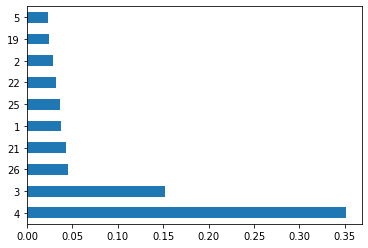

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3. Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You can learn more about the RFE class in the scikit-learn documentation.

The example below uses RFE with the logistic regression algorithm to select the top 10 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming you have already defined X and y

# Create the RFE model and select 10 best features
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
fit = rfe.fit(X, y)

# Create DataFrame to store selected features and their rankings
selected_features = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})

# Print the selected features
print(selected_features[selected_features['Ranking'] == 1])

   Feature  Ranking
2        2        1
4        4        1
17      17        1
19      19        1
21      21        1
22      22        1
25      25        1
26      26        1
29      29        1
35      35        1


### 4. Principal Component Analysis

[Principal Component Analysis](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/) (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In the example below, we use PCA and select 3 principal components.

Learn more about the PCA class in scikit-learn by reviewing the [PCA API](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Dive deeper into the math behind PCA on the [Principal Component Analysis Wikipedia article](https://en.wikipedia.org/wiki/Principal_component_analysis).

#### PCA Usefulness:
1. ***Dimension reduction***:  When dealing with datasets containing a large number of features, PCA can help reduce the dimensionality while preserving most of the variability in the data. This can lead to simpler models, reduced computational complexity, and alleviation of the curse of dimensionality. An example is here where we have 37 features

2. ***Data exploration/visualization***: PCA can be used to visualize high-dimensional data in lower-dimensional space (e.g., 2D or 3D) for exploratory data analysis and visualization. This can help uncover patterns, clusters, and relationships between variables.

3. ***Noise reduction***: PCA identifies and removes redundant information (noise) in the data by focusing on the directions of maximum variance. This can lead to improved model performance by reducing overfitting and improving generalization

4. ***Feature Creation***: PCA can be used to create new composite features (principal components) that capture the most important information in the original features. These components may be more informative or less correlated than the original features, potentially enhancing the performance of machine learning algorithms.

5. ***Reducing computational Complexity***: In cases where the original dataset is large and computationally expensive to process, PCA can be used to reduce the size of the dataset without sacrificing much information. This can lead to faster training and inference times for machine learning models.

6. ***Addressing multicollinearity in the features***: PCA can mitigate multicollinearity issues by transforming correlated features into orthogonal principal components. This can improve the stability and interpretability of regression models.

In [7]:
from sklearn.decomposition import PCA

# Create the PCA model and specify the number of components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Create DataFrame to store principal components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, 11)])

# Print the explained variance ratio of each principal component
print(pca.explained_variance_ratio_)

# Print the first few rows of the transformed data
print(pca_df.head())

[0.165 0.114 0.111 0.086 0.075 0.059 0.055 0.042 0.039 0.035]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.072415  0.472525  1.597179  0.110169 -0.096852 -0.666902  0.002934   
1  0.121378 -0.747126  0.669584  0.807667  1.212094  0.999779 -0.308788   
2  1.147935 -0.259399  0.577820  0.373439 -0.660275 -0.420732 -0.169564   
3 -0.227015 -0.533407  0.930931 -0.619797 -0.145277  0.513711 -0.232388   
4  0.900289 -0.002575  0.200828  0.175920 -1.077896  1.097199  0.381326   

        PC8       PC9      PC10  
0  0.024823  0.466306 -0.190280  
1  0.213120  0.109383 -0.091919  
2  0.018762 -0.195644 -0.369087  
3 -0.304223  0.203956 -0.155300  
4  0.606125 -0.591878  0.233130  


### 5. Correlation Matrix with Heatmap

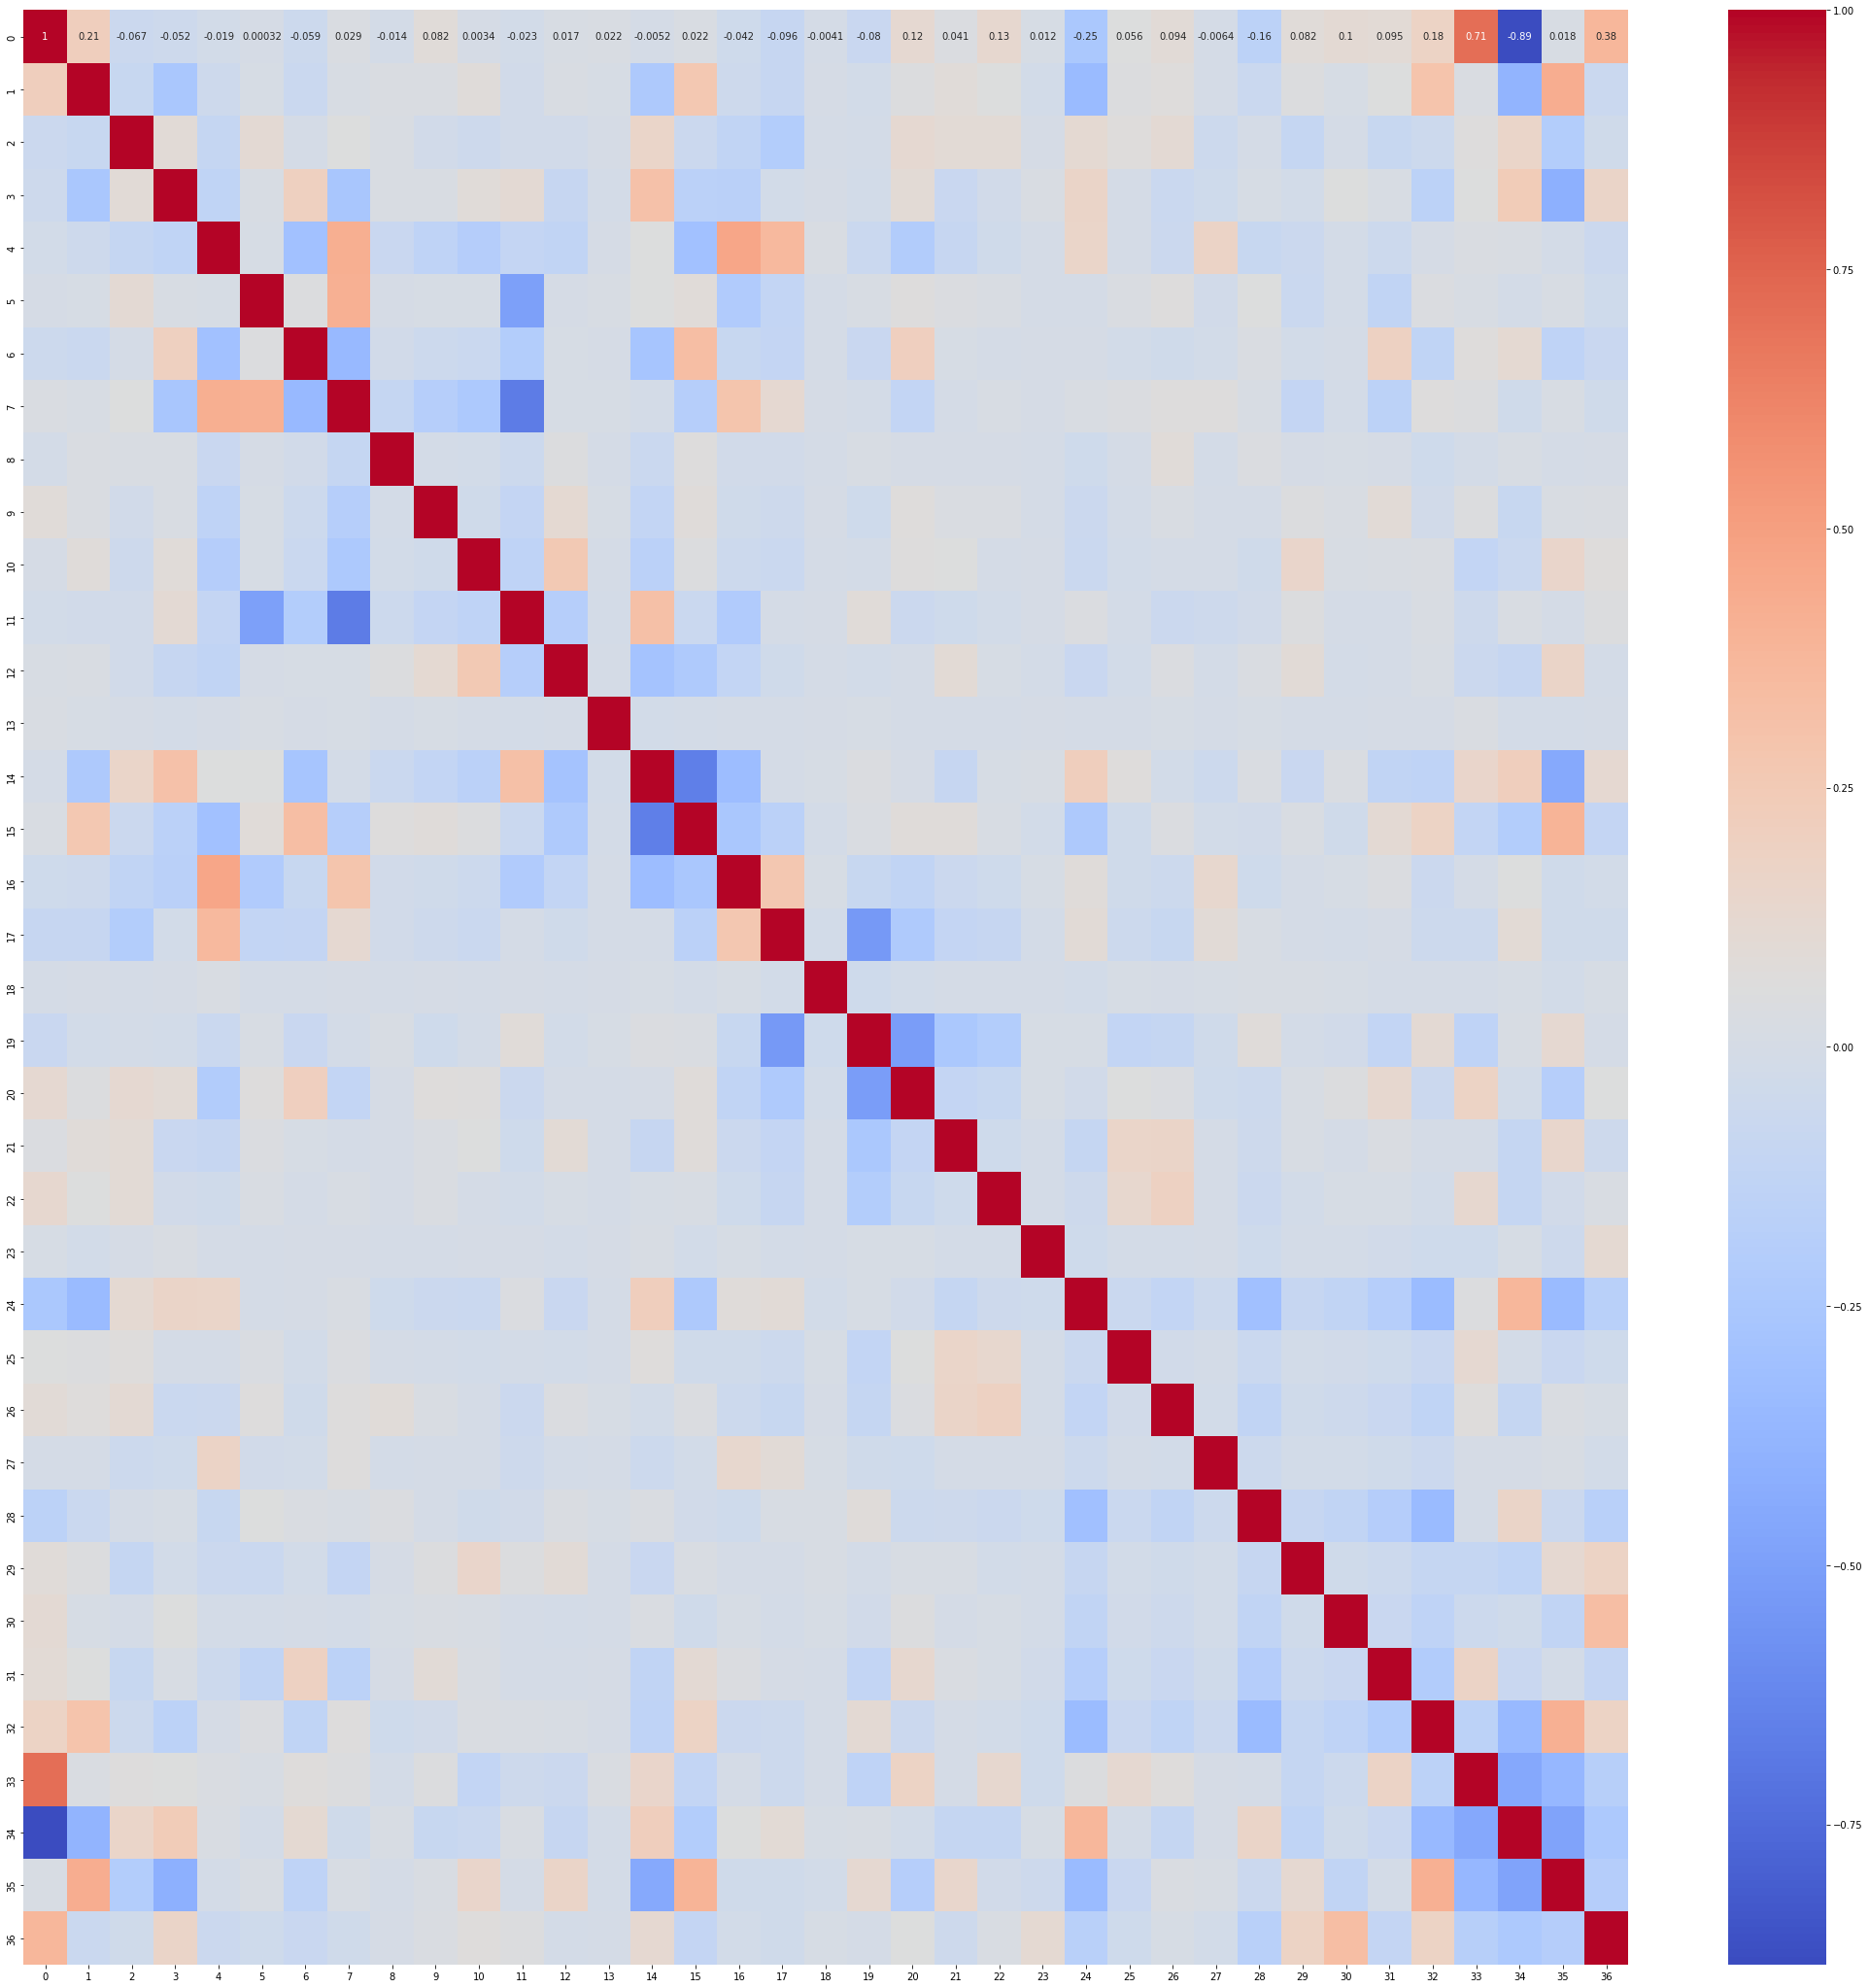

In [12]:
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(37,37))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="coolwarm")

### Further reading


https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

Based on the type of ML and the features one can choose any of these methods:

![feat_selection_technique_1](assets/feat_selection_technique_1.png)

Based on the datatypes of the features themselves, one can also pick a statistical method to work with either univariate or otherwise

![feat_selection_technique_2](assets/feat_selection_technique_2.png)